In [2]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

(2944, 2208, 3)


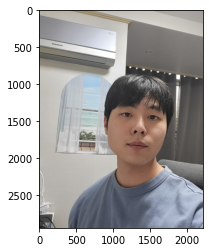

In [3]:
# 본인이 선택한 이미지의 경로에 맞게 바꿔 주세요.
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_image.png'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
# 저장할 파일 이름을 결정합니다
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f0ea905c5b0>)

In [5]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [6]:
segvalues, output = model.segmentAsPascalvoc(img_path)

In [7]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

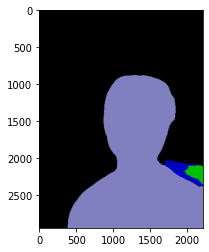

In [8]:
plt.imshow(output)
plt.show()

In [9]:
segvalues

{'class_ids': array([ 0,  9, 15, 18]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]])}

In [10]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
chair
person
sofa


In [11]:
# 아래 코드를 이해하지 않아도 좋습니다
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 생상 코드 결과물이예요!
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [12]:
colormap[15]

array([192, 128, 128])

In [13]:
seg_color = (128,128,192)

(2944, 2208)


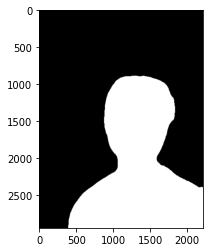

In [14]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

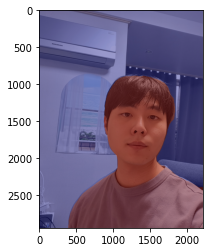

In [15]:
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

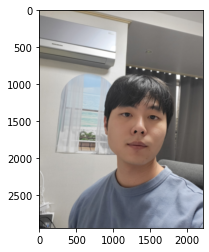

In [16]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig, (13,13))  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

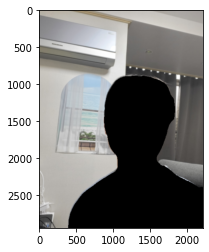

In [17]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

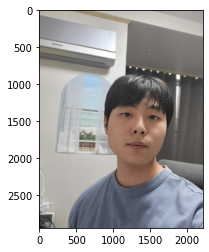

In [18]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

(3840, 2160, 3)


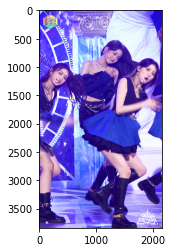

In [19]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/jang.png'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [20]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [21]:
segvalues, output = model.segmentAsPascalvoc(img_path)

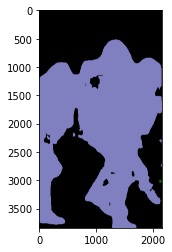

In [22]:
plt.imshow(output)
plt.show()

In [23]:
segvalues

{'class_ids': array([ 0,  2, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [24]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
bicycle
person


In [25]:
# 아래 코드를 이해하지 않아도 좋습니다
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 생상 코드 결과물이예요!
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [26]:
seg_color = (128,128,192)

(3840, 2160)


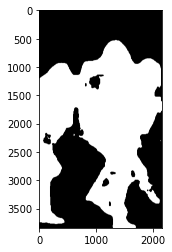

In [27]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

(3840, 2160)


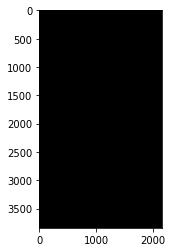

In [28]:
seg_color1 = (128,0,64)
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_map1 = np.all(output==seg_color1, axis=-1)
print(seg_map1.shape)
plt.imshow(seg_map1, cmap='gray')
plt.show()

# 사람들이 뭉쳐져서 한 사람으로 보이는 문제 발견 

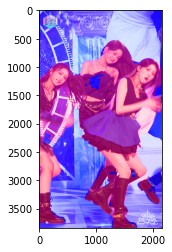

In [29]:
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.9, color_mask, 0.9, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

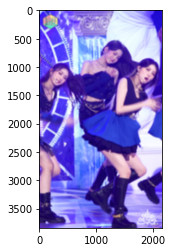

In [30]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig, (30,30))  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

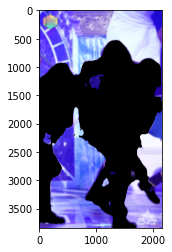

In [31]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

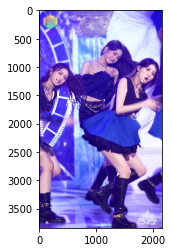

In [32]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
e1 = cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

In [33]:
seg_map = np.where(output == 128 , 128, 128) # 예측 중 고양이만 추출
cat_img_mask = seg_map * (255/seg_map.max()) # 255 normalization
cat_img_mask = cat_img_mask.astype(np.uint8)
cat_color_mask = cv2.applyColorMap(cat_img_mask, cv2.COLORMAP_JET)
cat_img_show = cv2.addWeighted(img_show, 0.6, cat_color_mask, 0.35, 0.0)


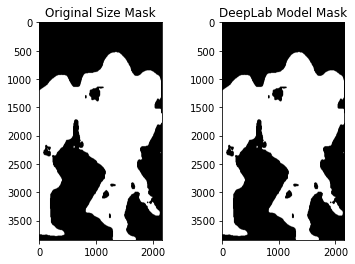

In [39]:
img_mask_up = cv2.resize(img_mask, img_orig.shape[:2][::-1], interpolation=cv2.INTER_LINEAR)
_, img_mask_up = cv2.threshold(img_mask_up, 128, 255, cv2.THRESH_BINARY)

img_mask_color = cv2.cvtColor(img_mask_up, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)

# 사람과 분리된 이미지를 사용하고 해당 이미지를 흐리게 만든다.
i_dont_want_to_hurt_her = cv2.bitwise_and(img_orig, img_bg_mask)

plt.imshow(i_dont_want_to_hurt_her) # 어떤 이미지가 흐려질지 확인을 위해 출력하기

img_bg_blur2 = cv2.blur(i_dont_want_to_hurt_her, (25,25)) # 출력된 이미지를 흐리게 하기
ax = plt.subplot(1,2,1)
plt.imshow(img_mask_up, cmap=plt.cm.binary_r)
ax.set_title('Original Size Mask')

ax = plt.subplot(1,2,2)
plt.imshow(img_mask, cmap=plt.cm.binary_r)
ax.set_title('DeepLab Model Mask')

plt.show()

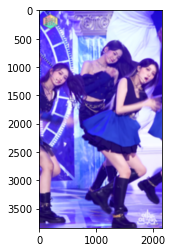

In [35]:
img_orig_blur = cv2.blur(img_orig, (25,25)) #(25,25은 blurring  kernel size를 뜻합니다. 

plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

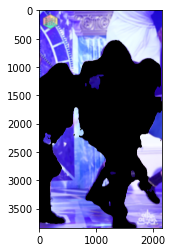

In [36]:
# 흐려진 이미지에서 세그멘테이션 마스크를 이용해서 배경만 추출하기
img_mask_color = cv2.cvtColor(img_mask_up, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)

plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

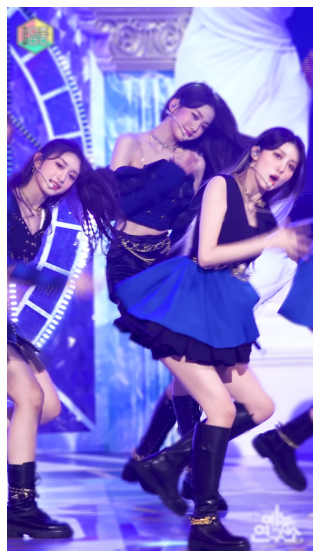

In [37]:
# 배경 영상과 사람 영상을 합치기
plt.figure(figsize=(10, 10))

img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

(-0.5, 2159.5, 3839.5, -0.5)

<Figure size 1440x720 with 0 Axes>

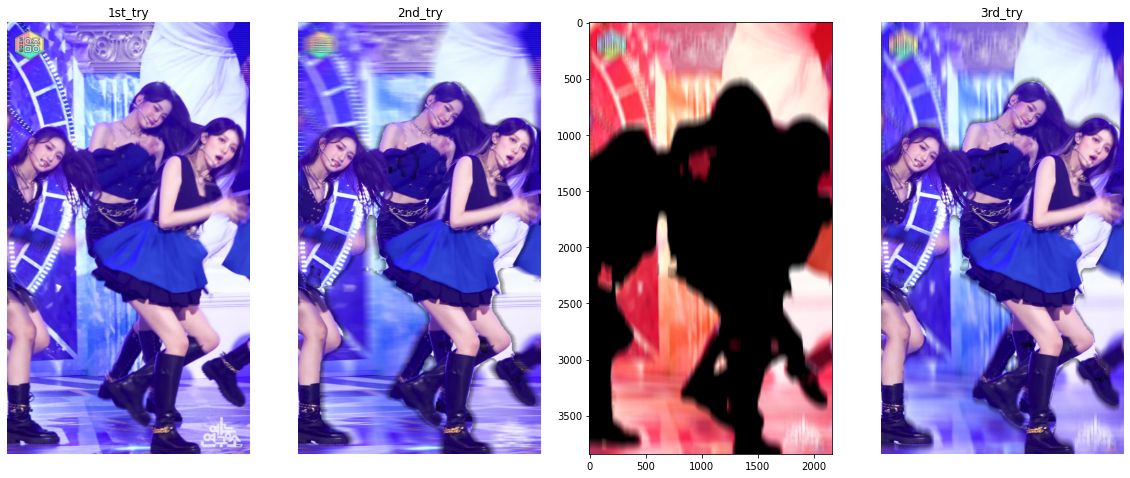

In [37]:
# 원본 이미지를 가우시안 Blur 처리한다.25,25 bluring kernel size 클수록 더 심하게 흐려진다 
orig_Gblur = cv2.GaussianBlur(img_orig, (25,25),0) 

e2 = (e1 * 66).astype(np.uint8)
img_Gmask = (cv2.GaussianBlur(e2, (0, 0), 74, 200)/255).astype(np.float32)
# 마스크와 이미지를 더해준다.
image_blur = img_Gmask*img_orig.astype(np.float32)
img_bg_mask = (1-img_Gmask)*orig_Gblur.astype(np.float32)
img_output2 = (image_blur+img_bg_mask).astype(np.uint8)
fig = plt.figure(figsize=(20, 10)) 

e3 = (e1 * 88).astype(np.uint8)

img_Gmask2 = (cv2.GaussianBlur(e3, (0, 0), 55, 100)/255).astype(np.float32)
# 마스크와 이미지를 더해준다.
image_blur2 = img_Gmask2*img_orig.astype(np.float32)
img_bg_mask2 = (1-img_Gmask2)*orig_Gblur.astype(np.float32)
img_output11 = (image_blur2+img_bg_mask2).astype(np.uint8)

fig = plt.figure(figsize=(20, 20)) 


ax = plt.subplot(141)
plt.imshow(cv2.cvtColor(img_output11.astype(np.uint8),cv2.COLOR_BGR2RGB))
plt.title('1st_try')
plt.axis('off')

# 세그멘테이션 마스크 이용해서 배경만 추출하기 
img_bg_mask1 = cv2.bitwise_not(img_mask_color)
i_dont_want_to_hurt_her = cv2.bitwise_and(img_orig, img_bg_mask1)
img_bg_blur2 = cv2.blur(i_dont_want_to_hurt_her, (100,1)) # 출력된 이미지를 흐리게 하기

img_concat2 = np.where(img_mask_color==255, img_orig, img_bg_blur2) 
#img_concat2 이미지 합치기(밝은 부분은 오리지널, 어두운 부분은 blur 된 부분 으로 합치기) 


img_output2 = (img_concat2-image_blur/250).astype(np.uint8)

ax = plt.subplot(142)
plt.imshow(cv2.cvtColor(img_output2.astype(np.uint8),cv2.COLOR_BGR2RGB))
plt.title('2nd_try')
plt.axis('off')

img_bg_mask3 = cv2.bitwise_not(img_mask_color)
derheurigaehagi3 = cv2.bitwise_and(img_orig, img_bg_mask3)
img_bg_blur3 = cv2.blur(derheurigaehagi3, (1,100)) # 출력된 이미지를 흐리게 하기
# 왼쪽 이미지는 장원영과
#배경을 분리할 때 검은색 처리된 부분이 흐리게 되서 그런지(blur) 검은 영역이 보이며 경계선이 더 명확해 졌다.


img_concat3 = np.where(img_mask_color==255, img_orig, img_bg_blur3)


img_output2 = (img_concat2-image_blur/250).astype(np.uint8)


ax = plt.subplot(143)
plt.imshow(img_bg_blur3)


ax = plt.subplot(144)
plt.imshow(cv2.cvtColor(img_concat3,cv2.COLOR_BGR2RGB))
plt.title('3rd_try')
plt.axis('off')

# plt.show()
# img_concat1 = np.where(img_mask_color==255, img_orig, img_Gmask)
# plt.imshow(cv2.cvtColor(img_concat1, cv2.COLOR_BGR2RGB))


 ### 2nd try 보다 3rd try 가 구두랑 다리 사이 부분이 스무스하게 변하였다
 ### 그럼 이제 장원영의 옷 안쪽 처리랑 , 윤곽처리를 더 부드럽게 해주겠다. 
 
 # 따라서 gaussian blur 를 사용한다. 
 
 ## GaussianBlur( src, dst, kernel_size, sigma_x, sigma_y, borderType) 
 
 ###  : sigma_x : X 방향 표준편차 , kernel_size : 가우시안 함수가 적용된 커널 마스크의 크기, borderType : 이미지의 테두리 바깥쪽의 가상의 픽셀들을 어떻게 처리할 것인지 선택 , BORDER_REFLECT101  또는  4 

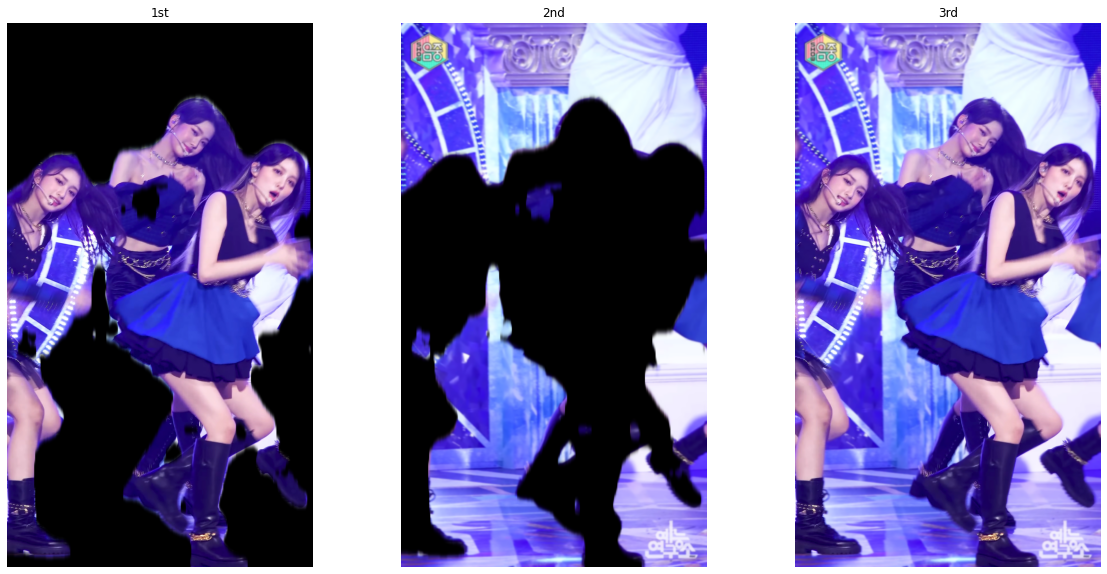

In [40]:
# img_mask_up의 채널을 원본 사진과 맞게 3 channel로 바꾼다.
img_mask_3C = np.repeat(np.expand_dims(img_mask_up, axis=2), 3, axis=2).astype(np.uint8)

# 원본 이미지를 가우시안 Blur 처리한다.
orig_Gblur = cv2.GaussianBlur(img_orig, (25,25),0)
# 마스크 이미지를 가우시안 Blur 처리한다.
img_Gmask = (cv2.GaussianBlur(img_mask_3C, (1, 101), 25, 25, 16)/255).astype(np.float32)

# 마스크와 이미지를 더해준다.
image_blur = img_Gmask*img_orig.astype(np.float32)
img_bg_mask = (1-img_Gmask)*orig_Gblur.astype(np.float32)
img_output = (image_blur+img_bg_mask).astype(np.uint8)

# GaussianBlur 처리한 부분을 확인하기
fig = plt.figure(figsize=(20, 10)) 

ax = plt.subplot(131)
plt.imshow(cv2.cvtColor(image_blur.astype(np.uint8),cv2.COLOR_BGR2RGB))
plt.title('1st')
plt.axis('off')
ax = plt.subplot(132)
plt.imshow(cv2.cvtColor(img_bg_mask.astype(np.uint8),cv2.COLOR_BGR2RGB))
plt.title('2nd')
plt.axis('off')
ax = plt.subplot(133)
plt.imshow(cv2.cvtColor(img_output,cv2.COLOR_BGR2RGB))
plt.title('3rd')
plt.axis('off')
plt.show()

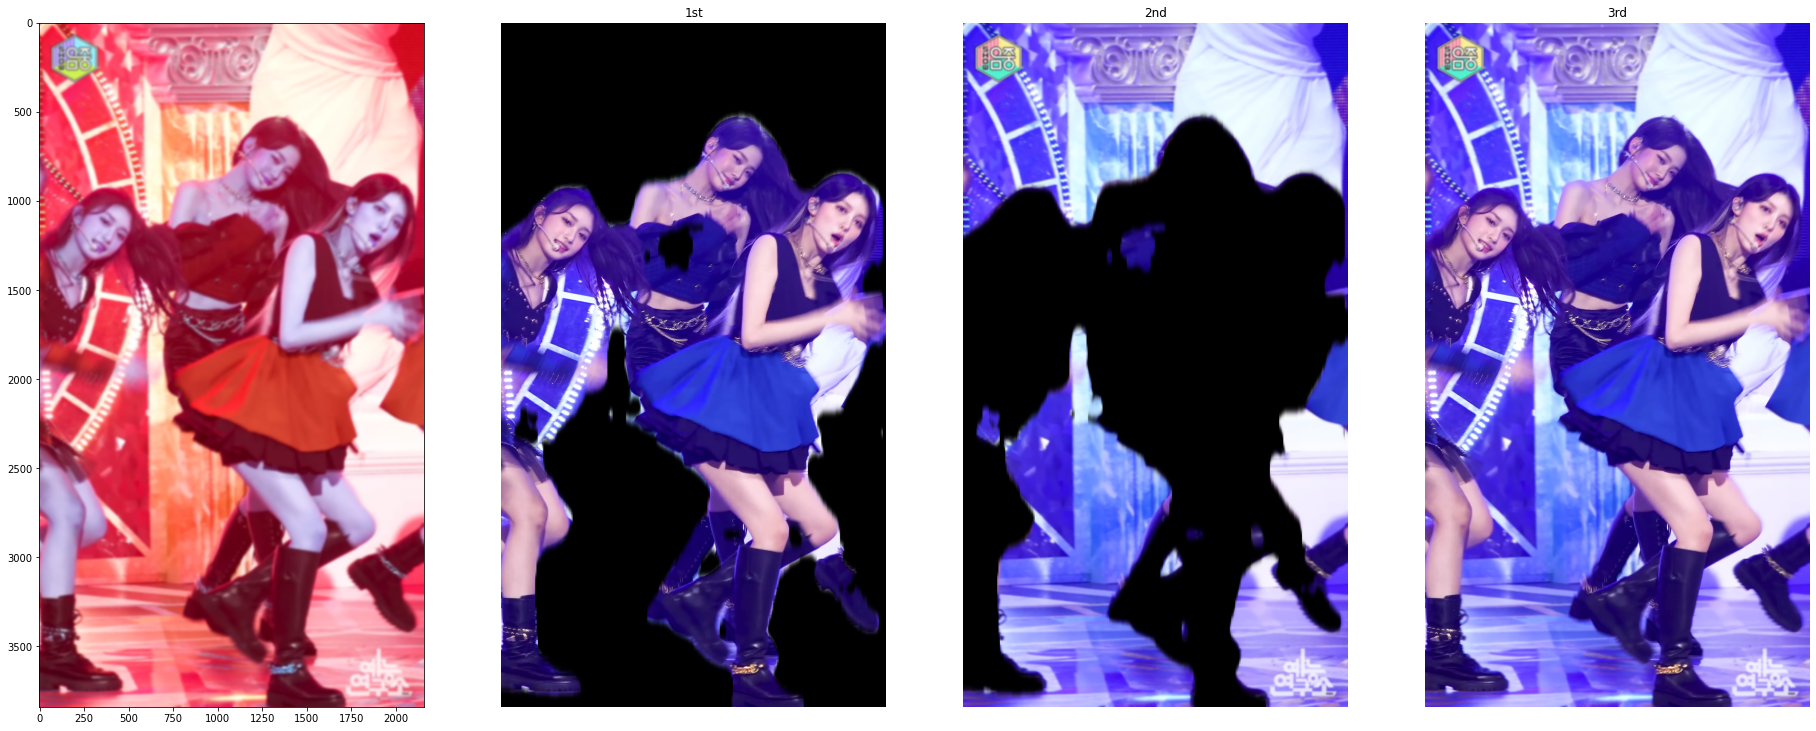

In [41]:
# img_mask_up의 채널을 원본 사진과 맞게 3 channel로 바꾼다.
img_mask_3C = np.repeat(np.expand_dims(img_mask_up, axis=2), 3, axis=2).astype(np.uint8)

# 원본 이미지를 가우시안 Blur 처리한다.
orig_Gblur = cv2.GaussianBlur(img_orig, (25,25),0,1)
orig_Gblur2 = cv2.GaussianBlur(orig_Gblur, (25,25),0,1)
# 마스크 이미지를 가우시안 Blur 처리한다.
img_Gmask = (cv2.GaussianBlur(img_mask_3C, (1, 101), 25, 25, 16)/255).astype(np.float32)
img_Gmark2 = (cv2.GaussianBlur(img_Gmask, (1, 101), 25, 25, 16)/255).astype(np.float32)
# 마스크와 이미지를 더해준다.
image_blur = img_Gmask*img_orig.astype(np.float32)
image_blur2 = img_Gmask2*img_orig.astype(np.float32)
img_bg_mask = (1-img_Gmask)*orig_Gblur.astype(np.float32)

image_blur2 = img_Gmask2*img_orig.astype(np.float32)                                  
img_bg_mask2 = (1-img_Gmask2)*orig_Gblur2.astype(np.float32)    

img_output = (image_blur+img_bg_mask).astype(np.uint8)

img_output2 = ( image_blur + img_bg_mask2 ).astype(np.uint8)
img_output3 = 1-img_output2
# GaussianBlur 처리한 부분을 확인하기
fig = plt.figure(figsize=(40, 40)) 

ax = plt.subplot(151) #1개 행 4개 열 의 행렬의 1번째 그림
plt.imshow(orig_Gblur2) # 그냥 plot 해준다

ax = plt.subplot(152)
plt.imshow(cv2.cvtColor(image_blur.astype(np.uint8),cv2.COLOR_BGR2RGB))
plt.title('1st')
plt.axis('off')

ax = plt.subplot(153)
plt.imshow(cv2.cvtColor(img_bg_mask.astype(np.uint8),cv2.COLOR_BGR2RGB))
plt.title('2nd')
plt.axis('off')

ax = plt.subplot(154)
plt.imshow(cv2.cvtColor(img_output,cv2.COLOR_BGR2RGB))
plt.title('3rd')
plt.axis('off')
plt.show()



NameError: name 'img_output2' is not defined

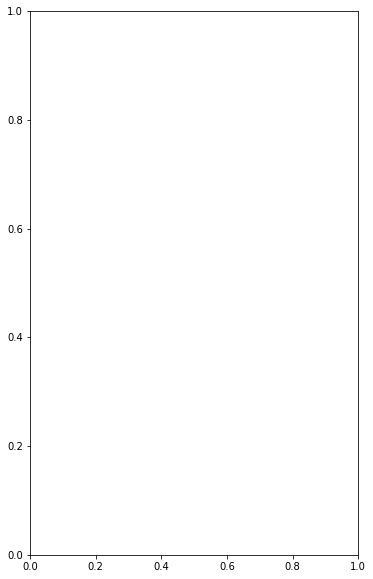

In [35]:
fig = plt.figure(figsize=(20, 10)) 

ax = plt.subplot(131)
plt.imshow(cv2.cvtColor(img_output2.astype(np.uint8),cv2.COLOR_BGR2RGB))
plt.title('4rd')
plt.axis('off')
plt.show()
img_Gmask3 = (cv2.GaussianBlur(img_output2, (1, 101), 25, 25, 16)/255).astype(np.float32)

# colormap = np.zeros((256, 3), dtype = int)
# ind = np.arange(256, dtype=int)

# for shift in reversed(range(8)):
#     for channel in range(3):
#         colormap[:, channel] |= ((ind >> channel) & 1) << shift
#     ind >>= 3

# colormap[:20]

dst1 = cv2.inRange(img_output2, (0, 128, 0), (100, 255, 100))
cv2.imshow('dst1', dst1)

ax = plt.subplot(132)
plt.imshow(img_Gmask3)
plt.title('image_blur2')
plt.axis('off')
plt.show()




In [ ]:
ax = plt.subplot(132)
plt.imshow(img_output2)
plt.title('image_blur2')
plt.axis('off')
plt.show()


In [ ]:
ax = plt.subplot(133)
plt.imshow(cv2.cvtColor(img_bg_mask.astype(np.uint8),cv2.COLOR_BGR2RGB))
plt.title('2nd')
plt.axis('off')

In [ ]:
## i_dont_want_to_hurt_her = cv2.bitwise_and(img_orig, img_bg_mask1)
## img_bg_blur2 = cv2.blur(i_dont_want_to_hurt_her, (1,100)) # 출력된 이미지를 흐리게 하기
## 이 부분에서 1,100 해주면 위아래로 흔들거리는 것 같은 효과를 줌 
## 이 부분에서 100,1 해주면 왼쪽 오른쪽으로 흔들거리는 것 같은 효과를 줌 

In [ ]:
# img_mask_up의 채널을 원본 사진과 맞게 3 channel로 바꾼다.
img_mask_3C = np.repeat(np.expand_dims(img_mask_up, axis=2), 3, axis=2).astype(np.uint8)

# 원본 이미지를 가우시안 Blur 처리한다.
orig_Gblur = cv2.GaussianBlur(img_orig, (25,25), 0 )
# 마스크 이미지를 가우시안 Blur 처리한다.
img_Gmask = (cv2.GaussianBlur(img_mask_3C, (55, 1), 110, 2)/255).astype(np.float32)

# 마스크와 이미지를 더해준다.
image_blur = img_Gmask*img_orig.astype(np.float32)
img_bg_mask = (1-img_Gmask)*orig_Gblur.astype(np.float32)
img_output = (image_blur+img_bg_mask).astype(np.uint8)

# GaussianBlur 처리한 부분을 확인하기
fig = plt.figure(figsize=(20, 10)) 

ax = plt.subplot(131)
plt.imshow(cv2.cvtColor(image_blur.astype(np.uint8),cv2.COLOR_BGR2RGB))
plt.title('1st')
plt.axis('off')
ax = plt.subplot(132)
plt.imshow(cv2.cvtColor(img_bg_mask.astype(np.uint8),cv2.COLOR_BGR2RGB))
plt.title('2nd')
plt.axis('off')
ax = plt.subplot(133)
plt.imshow(cv2.cvtColor(img_output,cv2.COLOR_BGR2RGB))
plt.title('3rd')
plt.axis('off')
plt.show()

# 밑 쪽에는 더 입체감이 있고 아래쪽에 입체감이 좀 덜해지게 됨--> 입체감의 뎁스 구현

## cv2.GaussianBlur(src, ksize, sigmaX, dst=None, sigmaY=None, borderType=None) -> dst

## • src: 입력 영상. 각 채널 별로 처리됨.
## • dst: 출력 영상. src와 같은 크기, 같은 타입.
## • ksize: 가우시안 커널 크기. (0, 0)을 지정하면 sigma 값에 의해 자동 결정됨
## • sigmaX: x방향 sigma.
## • sigmaY: y방향 sigma. 0이면 sigmaX와 같게 설정.
## • borderType: 가장자리 픽셀 확장 방식.